In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

DATA SET LOADING

In [2]:
df = pd.read_csv('/home/pt/Downloads/Global Terrorism Data.csv')

/tmp/ipykernel_7563/2274404957.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/home/pt/Downloads/Global Terrorism Data.csv')


In [3]:
df

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


DATASET FIRST VIEW

In [4]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
#to count the rows and column we need to check the shape of the dataframe

df.shape

#no of rows = 181691
#no of columns = 135

(181691, 135)

DATASET INFORMATION

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [7]:
terror = df[['eventid','iyear','imonth','iday','country_txt','region_txt','provstate','city','latitude','longitude','summary','success','suicide','attacktype1_txt','targtype1_txt','gname','weaptype1_txt','suicide','nwound','nkill']]

terror.shape

(181691, 20)

In [8]:
terror = terror.rename(columns={'iyear':'year','imonth':'month','iday':'day','country_txt':'country','region_txt':'region','attacktype1_txt':'attacktype','targtype1_txt':'targettype','gname':'organisation','weaptype1_txt':'weapontype','nwound':'wound','nkill':'kill'})

In [9]:
terror.shape

(181691, 20)

array([[<Axes: title={'center': 'eventid'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>],
       [<Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>],
       [<Axes: title={'center': 'success'}>,
        <Axes: title={'center': 'suicide'}>,
        <Axes: title={'center': 'suicide'}>],
       [<Axes: title={'center': 'wound'}>,
        <Axes: title={'center': 'kill'}>, <Axes: >]], dtype=object)

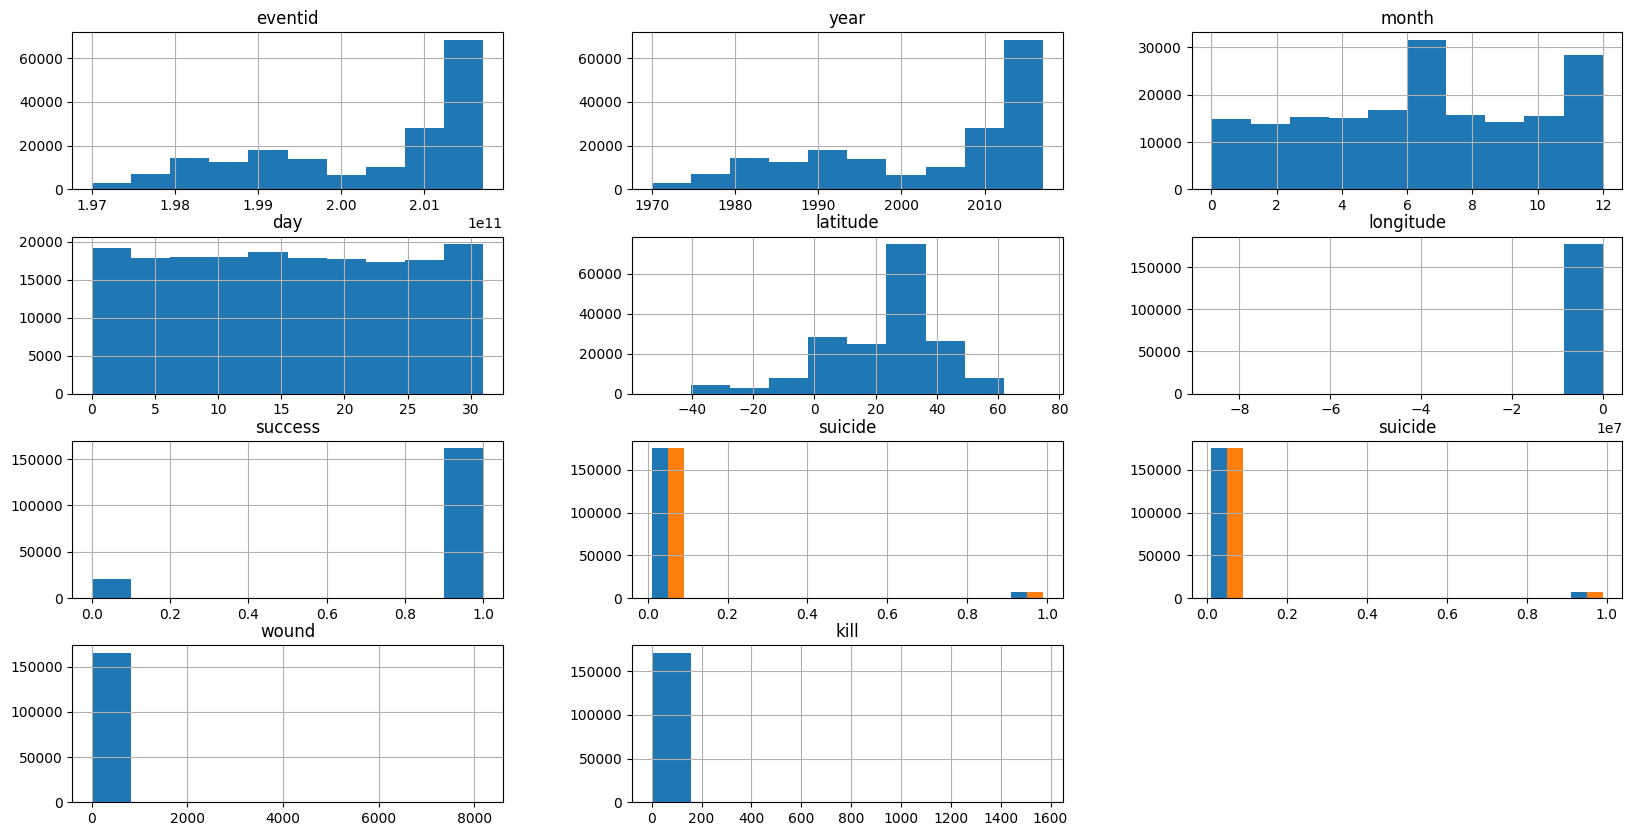

In [10]:
terror.hist(figsize=(20,10))

# it shows the distribution of data over each series in the dataframe

In [11]:
terror.eventid.value_counts().sum()

# 181691 terrorist attacks 

181691

In [12]:
terror.isna().sum()

eventid             0
year                0
month               0
day                 0
country             0
region              0
provstate         421
city              435
latitude         4556
longitude        4557
summary         66129
success             0
suicide             0
attacktype          0
targettype          0
organisation        0
weapontype          0
suicide             0
wound           16311
kill            10313
dtype: int64

In [13]:
terror['city'] = terror['city'].fillna('unknown')

In [14]:
terror['kill'] = terror['kill'].fillna(0)
terror.isna().sum()

eventid             0
year                0
month               0
day                 0
country             0
region              0
provstate         421
city                0
latitude         4556
longitude        4557
summary         66129
success             0
suicide             0
attacktype          0
targettype          0
organisation        0
weapontype          0
suicide             0
wound           16311
kill                0
dtype: int64

In [15]:
terror.describe()

,eventid,year,month,day,latitude,longitude,success,suicide,suicide,wound,kill
count,1.816910e+05,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,181691.000000,165380.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,0.889598,0.036507,0.036507,3.167668,2.266860
std,1.325957e+09,13.259430,3.388303,8.814045,18.569242,2.047790e+05,0.313391,0.187549,0.187549,35.949392,11.227057
min,1.970000e+11,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,1.000000,0.000000,0.000000,0.000000,0.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,1.000000,0.000000,0.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,1.000000,0.000000,0.000000,2.000000,2.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1.000000,1.000000,1.000000,8191.000000,1570.000000


In [16]:
terror.year.unique()

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1986, 1982, 1983, 1984, 1985, 1987, 1988, 1989, 1990, 1991,
       1992, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017])

COREREALATION ANALYS

In [55]:
terror.describe()

,eventid,year,month,day,latitude,longitude,success,suicide,suicide,wound,kill
count,1.816910e+05,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,181691.000000,165380.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,0.889598,0.036507,0.036507,3.167668,2.266860
std,1.325957e+09,13.259430,3.388303,8.814045,18.569242,2.047790e+05,0.313391,0.187549,0.187549,35.949392,11.227057
min,1.970000e+11,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,1.000000,0.000000,0.000000,0.000000,0.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,1.000000,0.000000,0.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,1.000000,0.000000,0.000000,2.000000,2.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1.000000,1.000000,1.000000,8191.000000,1570.000000


<Axes: >

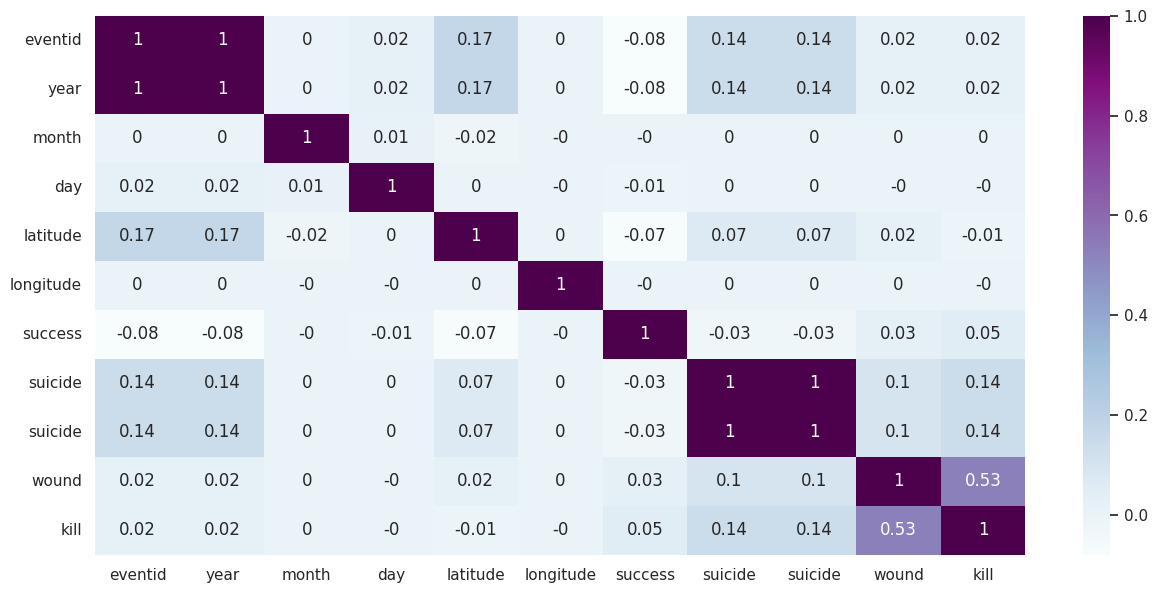

In [56]:
plt.figure(figsize=(15,7))
           
numeric_cols = terror.select_dtypes(include=[np.number])

corr_matrix = numeric_cols.corr()



#this wills show the relations between the variables
sns.heatmap(np.round(corr_matrix,2), annot= True, cmap= 'BuPu')

INSIGHT : FROM THE GRAPH IT CAN BE CONCLUDED THAT ONLY WOUND AND KILL IS CO RELATED BUT NOT HIHLY

ANALYSIS : To identify the trends and pattern of terrorist attacks over the years

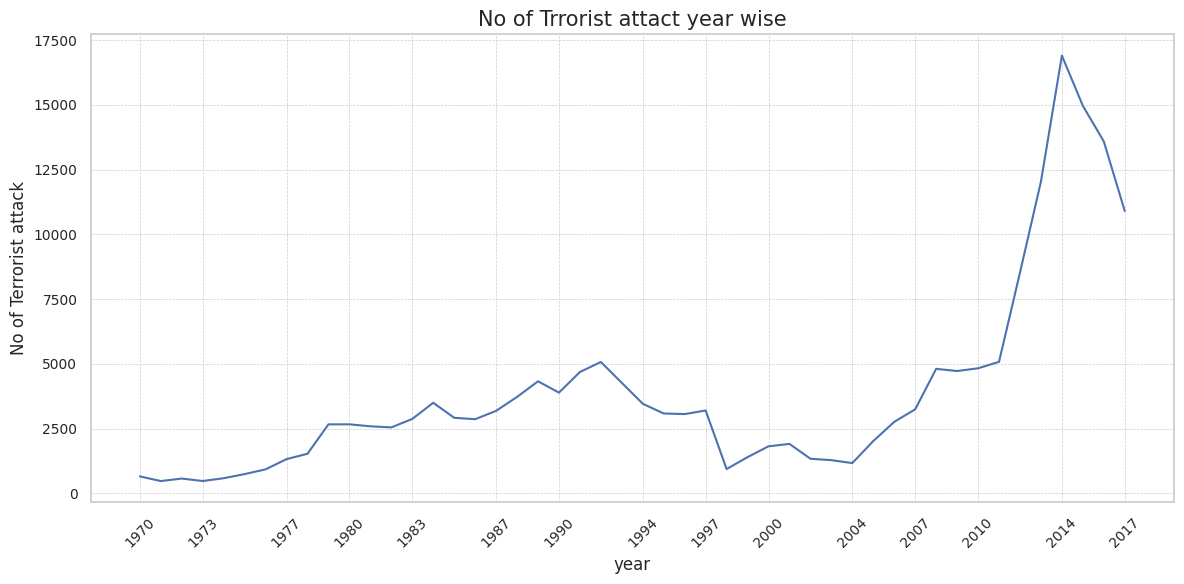

In [19]:
plt.figure(figsize=(12,6))
sns.set_theme(style="whitegrid")

sns.lineplot(x = terror.year.value_counts().index, y= terror.year.value_counts().values)

plt.xlabel('year',fontsize = 12)
plt.ylabel('No of Terrorist attack',fontsize = 12)
plt.title('No of Trrorist attact year wise', fontsize = 15)

tick_values = np.linspace(terror['year'].min(),terror['year'].max(),15)
tick_values = np.round(tick_values).astype(int)

plt.xticks(tick_values,rotation = 45,fontsize = 10)
plt.yticks(fontsize = 10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

INSGIHT : 2013 and 2014 has a large number of Terrorist activites

ANALYSIS : Terrorist activties by region in each year

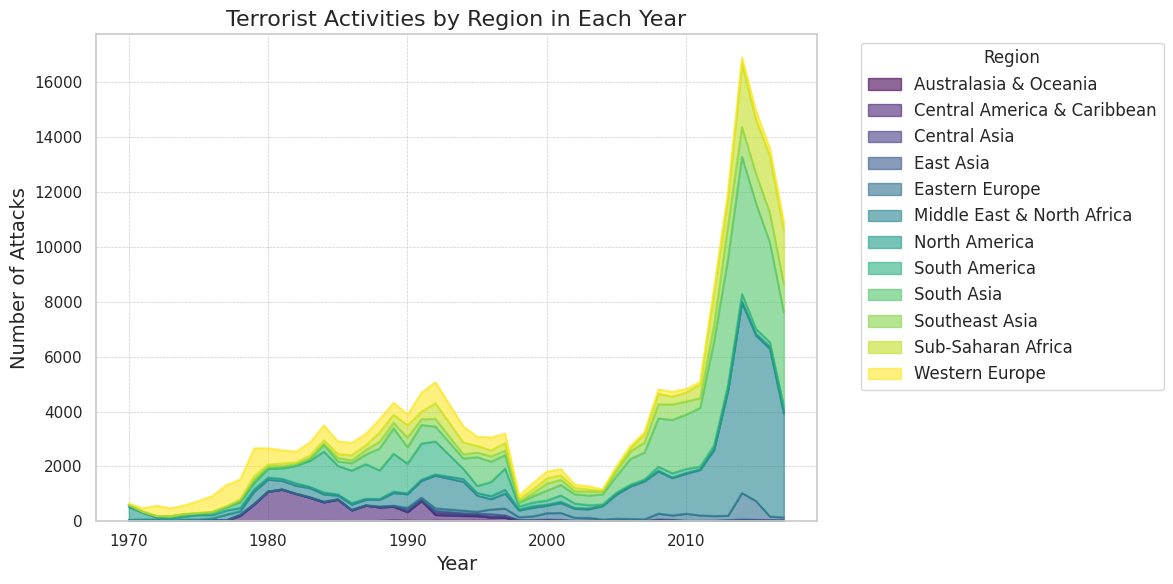

In [20]:
pd.crosstab(terror.year,terror.region).plot(kind = 'area',figsize=(12,6), alpha =0.6, colormap='viridis')

plt.title("Terrorist Activities by Region in Each Year", fontsize=16)
plt.ylabel('Number of Attacks', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc= 'upper left', fontsize=12)
plt.tight_layout()


plt.show()

ISNIGHT :western europe and sub saharan africa has tremendous increase in the terrorist activities 

ANALYSIS : how much percentage increase the terrorist activities from 2011 to 2014 as from the graph we can see there is drastically increase in the terrorist activites

In [21]:
year = terror.year.value_counts().to_dict()

per_rate = round(((year[2014]-year[2011])/year[2011])*100,2)

print(f"in 2011 the no of attacks are {year[2011]} and in year 2014 no of attacks are {year[2014]} so there is {per_rate} % increase ")

in 2011 the no of attacks are 5076 and in year 2014 no of attacks are 16903 so there is 233.0 % increase 


INSIGHT :in 2011 the no of attacks are 5076 and in year 2014 no of attacks are 16903 so there is 233.0 % increase  

Top 20 Countries with Most Terrorist Attacks

In [22]:
terror['country'].value_counts().head(20)

country
Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Sri Lanka          3022
United States      2836
Algeria            2743
France             2693
Egypt              2479
Name: count, dtype: int64

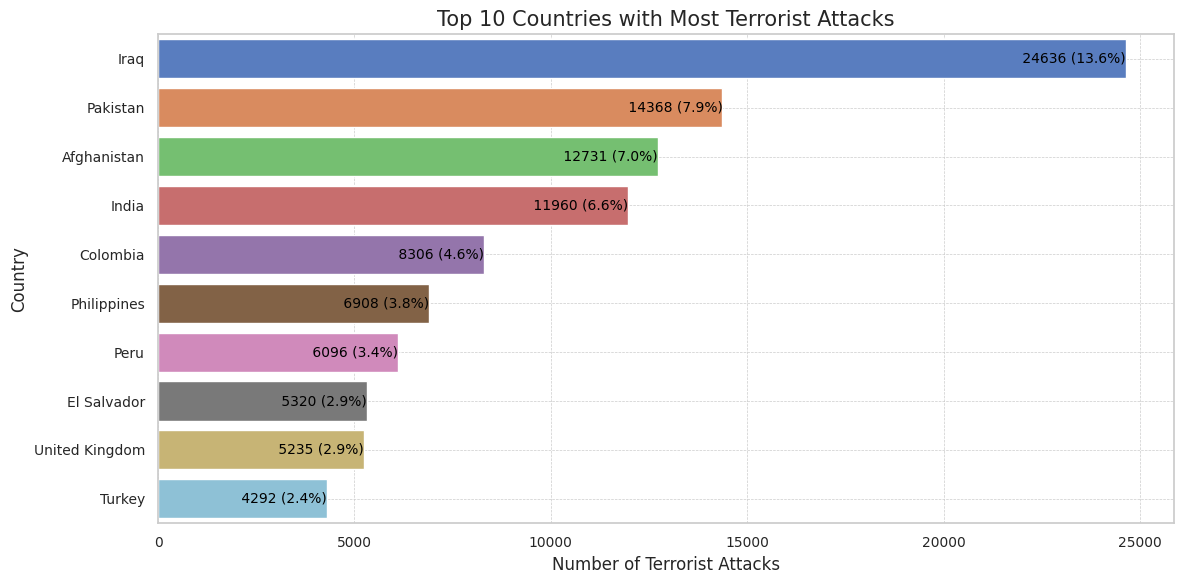

In [23]:
warnings.filterwarnings("ignore")

total_attacks = terror['country'].value_counts().sum()
top_countries = terror['country'].value_counts().head(10)
top_countries_perc = (top_countries / total_attacks) * 100

plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")

ax = sns.barplot(x=top_countries.values, y=top_countries.index, palette='muted')

for i, (value, perc) in enumerate(zip(top_countries.values, top_countries_perc)): # zip function take the two list and combine them into tuples
    ax.text(value, i, f' {value} ({perc:.1f}%)', va='center', ha='right', fontsize=10, color='black')

plt.title('Top 10 Countries with Most Terrorist Attacks', fontsize=15)
plt.xlabel('Number of Terrorist Attacks', fontsize=12)
plt.ylabel('Country', fontsize=12)


plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()


INSIGHT: Iraq experienced 2,436 terrorist attacks, accounting for 13.6% of the total attacks, while Pakistan experienced 14,368 terrorist attacks, representing 7.9% of the total attacks.


Analyze the distribution of different types of terrorist attacks.


In [24]:
india_terror

NameError: name 'india_terror' is not defined

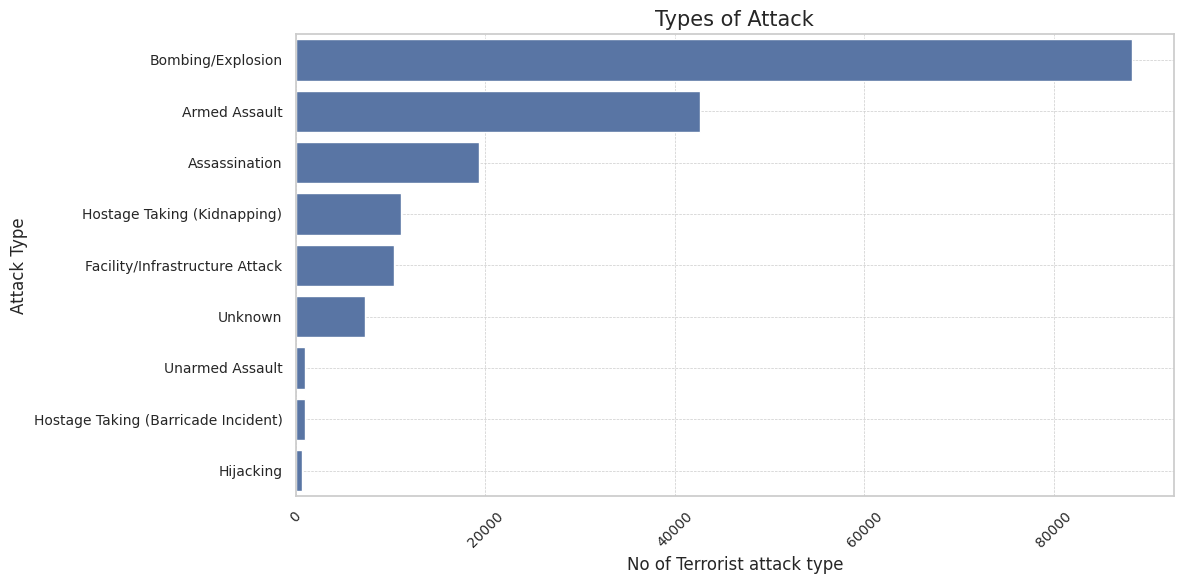

In [ ]:
warnings.filterwarnings("ignore")

attack_types = terror.attacktype.value_counts()

plt.figure(figsize=(12,6))
sns.set_theme(style="whitegrid")

sns.barplot(x= attack_types.values, y= attack_types.index)

plt.title('Types of Attack',fontsize = 15)
plt.xlabel('No of Terrorist attack type',fontsize = 12)
plt.ylabel('Attack Type', fontsize = 12)

plt.yticks(fontsize = 10)
plt.xticks(rotation = 45,fontsize = 10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

Investigate the primary targets of terrorist attacks.


In [53]:
target_type = terror.targettype.value_counts()

target_type

targettype
Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: count, dtype: int64

In [54]:
warnings.filterwarnings("ignore")

plt.figure(figsize=(12,6))
sns.set_theme(style="whitegrid")
attack_types
sns.barplot(x= target_type.values, y= target_type.index)

plt.title('Targets',fontsize = 15)
plt.xlabel('Number of times attacked',fontsize = 12)
plt.ylabel('Targets', fontsize = 12)

plt.yticks(fontsize = 10)
plt.xticks(rotation = 45,fontsize = 10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()



NameError: name 'attack_types' is not defined

<Figure size 1200x600 with 0 Axes>

INSIGHT : private citizens and property and militray are the most attacked 43511 and 27984 Times 

--------------------------------------------------------------------

Identify the most active terrorist groups.


In [ ]:
terror_groups = terror['organisation'].value_counts()

top_terror_groups = terror_groups[terror_groups > 10]

top_terror_groups=top_terror_groups.head(10)

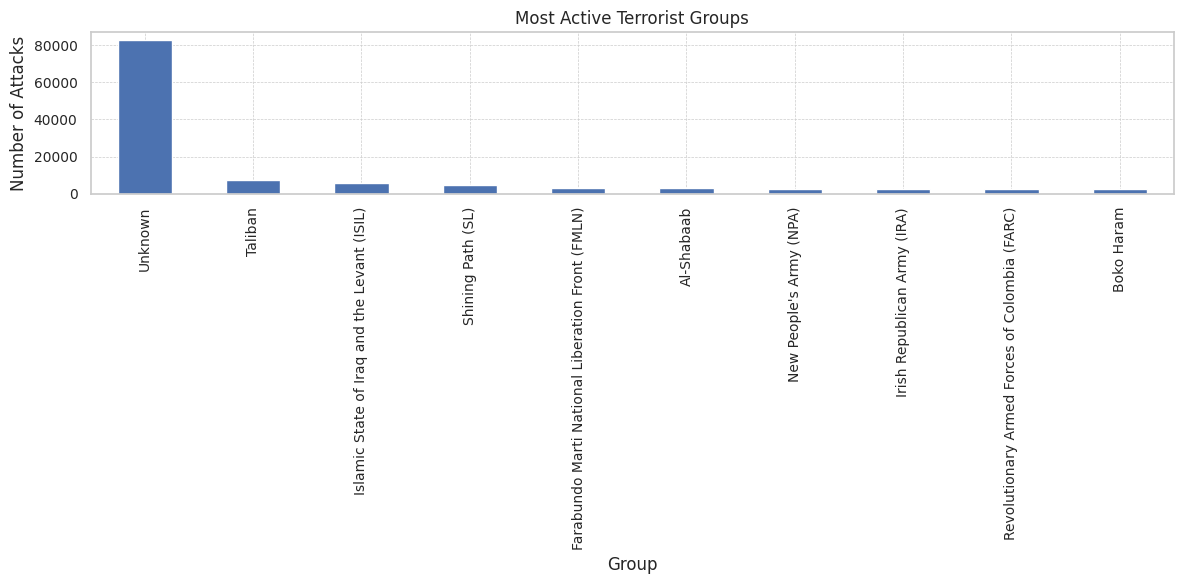

In [ ]:
plt.figure(figsize=(12,6))

top_terror_groups.plot(kind='bar', y= top_terror_groups.values, x= top_terror_groups.index)

plt.title('Most Active Terrorist Groups')
plt.xlabel('Group')
plt.ylabel('Number of Attacks')

plt.yticks(fontsize = 10)
plt.xticks(fontsize = 10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

Casualty Analysis:

Analyze the number of casualties (both killed and wounded) in different attacks.


In [ ]:
# casualties analysis

terror['casualties'] = terror['wound'].sum()+terror['kill'].sum()
casualties_per_attack = terror.groupby('year')['casualties'].sum()


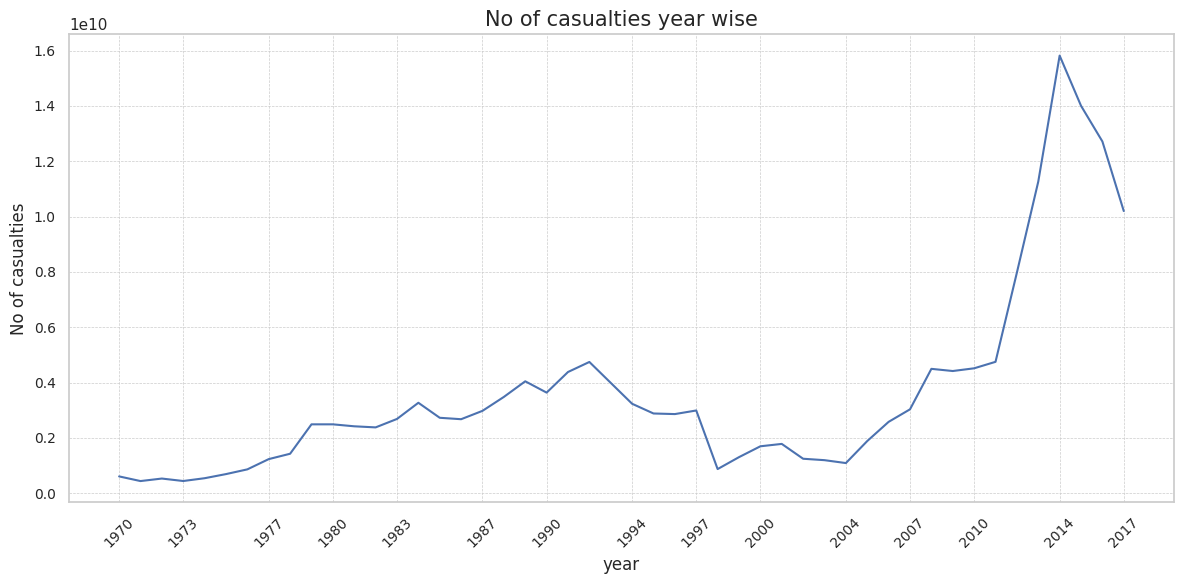

In [ ]:
plt.figure(figsize=(12,6))

sns.lineplot(x= casualties_per_attack.index,y= casualties_per_attack.values)

plt.xlabel('year',fontsize = 12)
plt.ylabel('No of casualties',fontsize = 12)
plt.title('No of casualties year wise', fontsize = 15)

tick_values = np.linspace(terror['year'].min(),terror['year'].max(),15)
tick_values = np.round(tick_values).astype(int)

plt.xticks(tick_values,rotation = 45,fontsize = 10)
plt.yticks(fontsize = 10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

In [ ]:
terror.columns

Index(['eventid', 'year', 'month', 'day', 'country', 'region', 'city',
       'success', 'suicide', 'attacktype', 'targettype', 'organisation',
       'weapontype', 'suicide', 'wound', 'kill', 'casualties'],
      dtype='object')

#succes rate of the terrorist attacked

ANALYSIS: Out of the total number of attacks, this report presents the percentage of those successfully executed by terrorist groups.

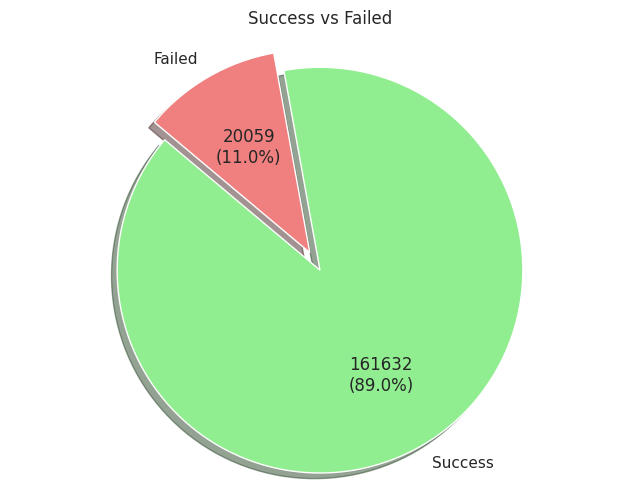

In [ ]:
import matplotlib.pyplot as plt

# Sample data for success and failed
success = len([i for i in terror.success if i == 1])
failed = len([i for i in terror.success if i != 1])

# Data to plot
labels = ['Success', 'Failed']
sizes = [success, failed]
colors = ['lightgreen', 'lightcoral']
explode = (0.1, 0)  # explode 1st slice (Success)

# Lambda function to display both the count and percentage
autopct = lambda pct: f'{int(round(pct*sum(sizes)/100.0))}\n({pct:.1f}%)'

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct=autopct, shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adding a title
plt.title('Success vs Failed')

# Displaying the chart
plt.show()


INSIGHT: Out of the total attacks, 89% were successfully executed, while 11% of the attacks failed.

Correlation Analysis:

Explore correlations between different features such as attack type, number of casualties, etc.

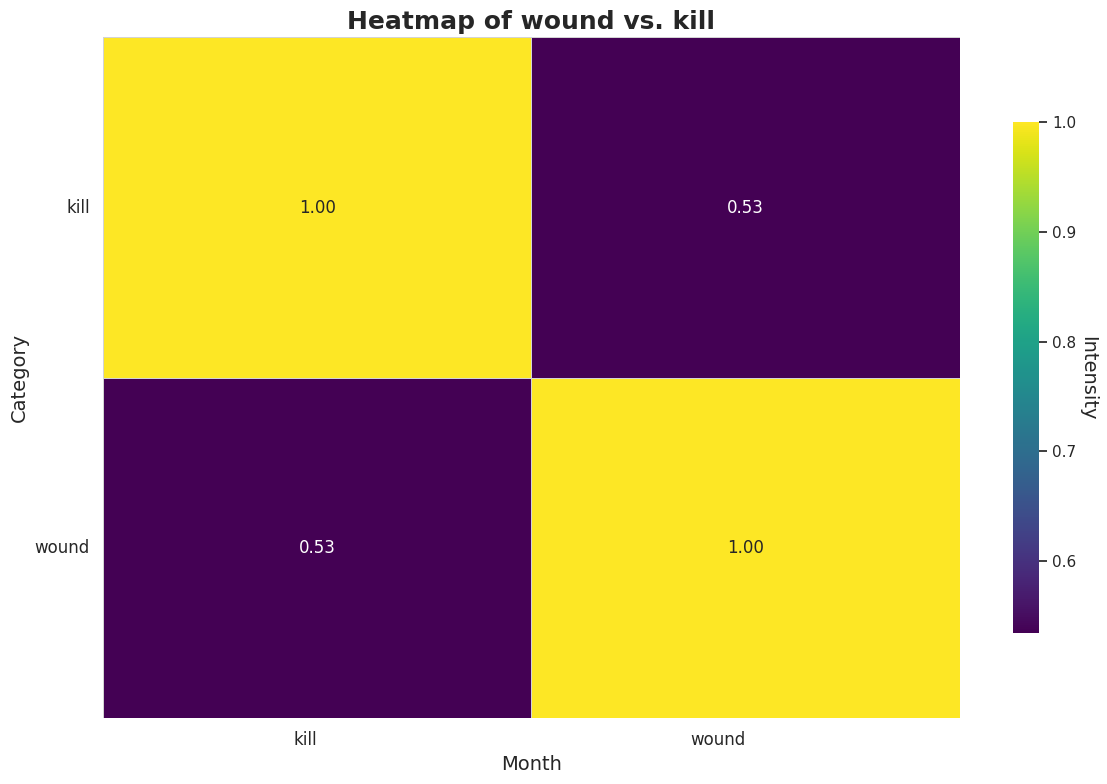

In [ ]:
coor_matix = terror[['kill','wound']].corr()

plt.figure(figsize=(12, 8))
sns.set_theme(style="white")

# Create a heatmap with a better color palette and additional customizations
ax = sns.heatmap(coor_matix, annot=True, fmt=".2f", cmap='viridis', linewidths=.5, linecolor='lightgrey', cbar_kws={"shrink": 0.75})

# Customize the title and labels
plt.title('Heatmap of wound vs. kill', fontsize=18, weight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Category', fontsize=14)

# Rotate the x and y labels if needed for better readability
plt.xticks(ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# Customize the color bar
cbar = ax.collections[0].colorbar
cbar.set_label('Intensity', rotation=270, labelpad=15, fontsize=14)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


The number of casualties corresponding to the killed people in each country for each year

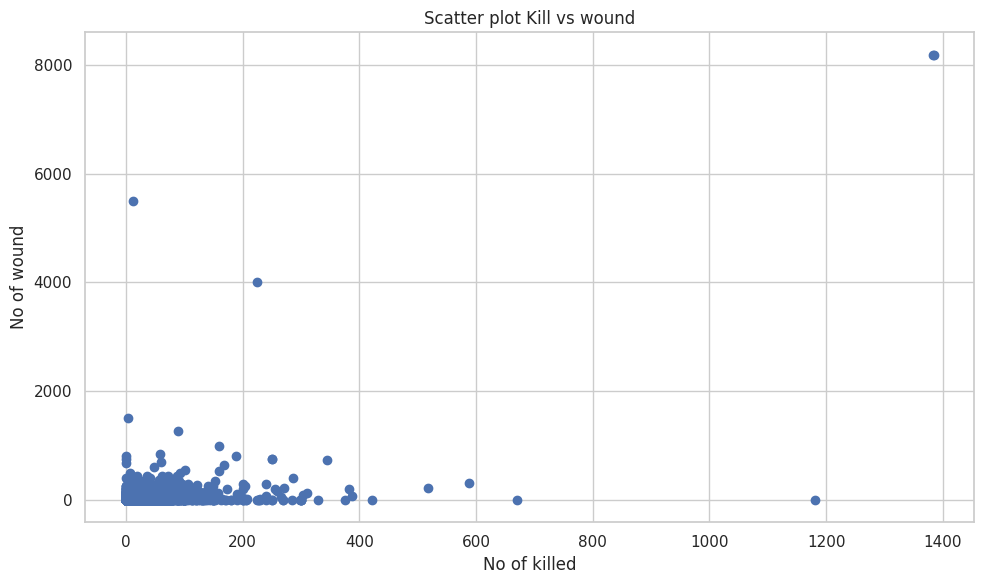

In [42]:
plt.figure(figsize=(10,6))

plt.scatter(x= terror['kill'],y= terror['wound'])

plt.xlabel('No of killed')
plt.ylabel('No of wound')
plt.title('Scatter plot Kill vs wound')

plt.tight_layout()
plt.show()

Methodss of Attack

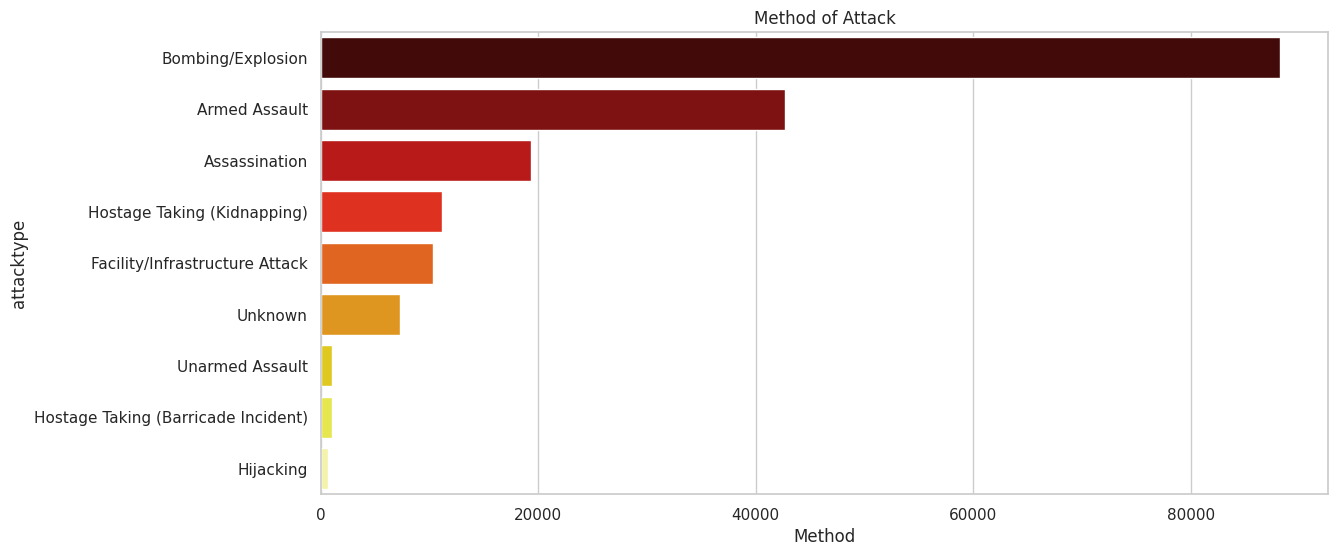

In [45]:
plt.figure(figsize=(13,6))

sns.countplot(terror['attacktype'], order= terror['attacktype'].value_counts().index, palette= 'hot')

plt.xlabel('Method')
plt.title('Method of Attack')

plt.show()

INSIGHT : Since from the above chart it is clear that Bombing/Explosion method was mostly used

TYPE OF TARGET

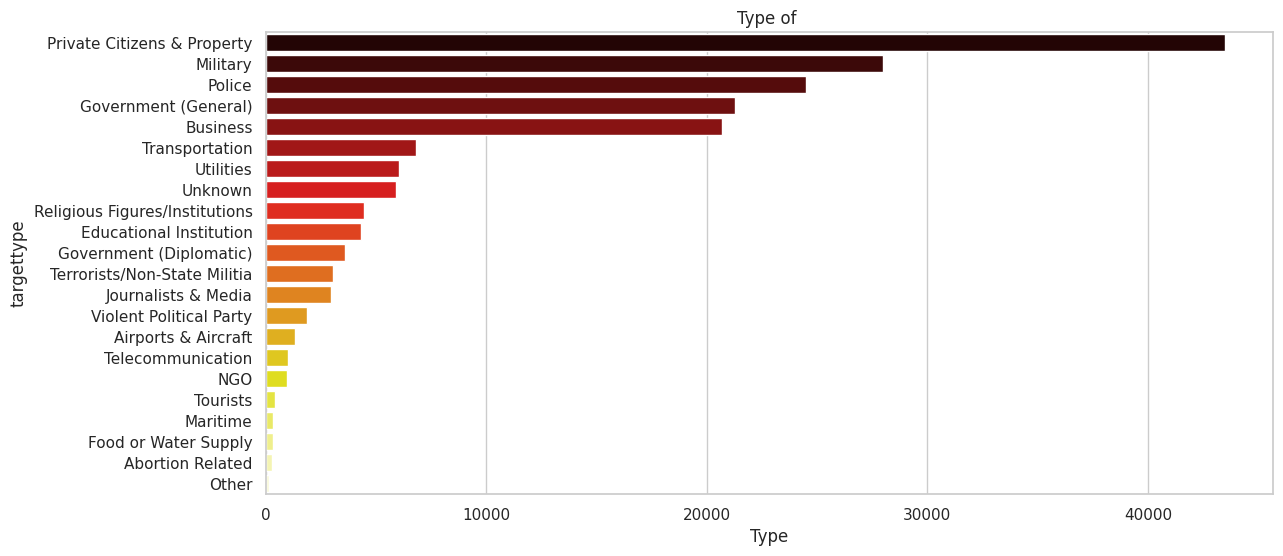

In [50]:
plt.figure(figsize=(13,6))

sns.countplot(terror['targettype'], order= terror['targettype'].value_counts().index, palette= 'hot')

plt.xlabel('Type')
plt.title('Type of ')

plt.show()

which are the top 10 cities in India affected by terrorism

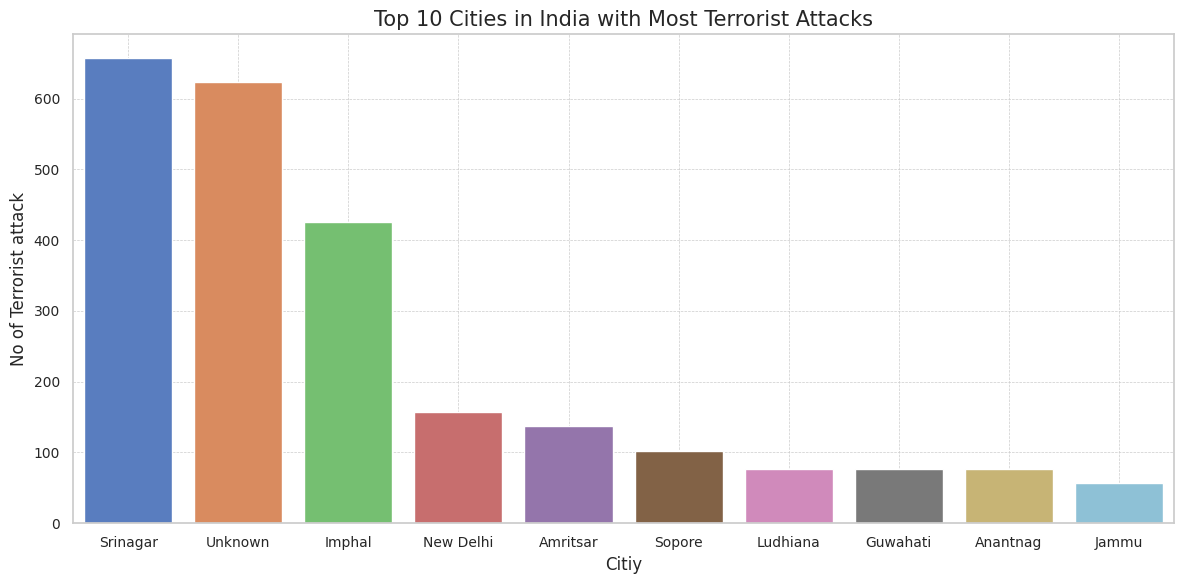

In [29]:
india_terror = terror[terror['country'] == 'India']
indian_city = india_terror.city.value_counts().head(10)

warnings.filterwarnings("ignore")

plt.figure(figsize=(12,6))
sns.set_theme(style="whitegrid")

sns.barplot(y= indian_city.values, x= indian_city.index, palette= 'muted')

plt.title('Top 10 Cities in India with Most Terrorist Attacks',fontsize = 15)
plt.xlabel('Citiy',fontsize = 12)
plt.ylabel('No of Terrorist attack', fontsize = 12)

plt.yticks(fontsize = 10)
plt.xticks(fontsize = 10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

INSIGHT : 
In India srinagar is the place with the most terrorist attack i.e  658

Analysis:Top 5 most active gropus in India

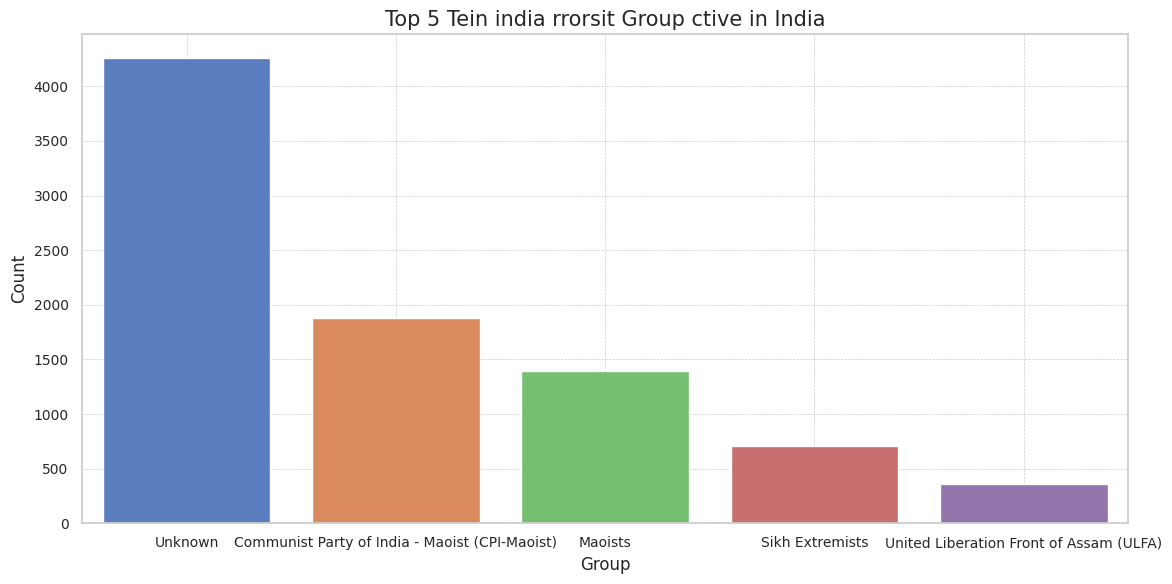

In [30]:
top_terrorists = india_terror['organisation'].value_counts().head(5)

warnings.filterwarnings("ignore")

plt.figure(figsize=(12,6))
sns.set_theme(style="whitegrid")

sns.barplot(y= top_terrorists.values, x= top_terrorists.index, palette= 'muted')

plt.title('Top 5 Tein india rrorsit Group ctive in India',fontsize = 15)
plt.xlabel('Group',fontsize = 12)
plt.ylabel('Count', fontsize = 12)

plt.yticks(fontsize = 10)
plt.xticks(fontsize = 10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

Analysis : success percentage attacked in india by terrorist organisation

In [31]:
percentage_of_success_rate = (india_terror['success'].sum() / india_terror['success'].count())*100

round(percentage_of_success_rate,2)

85.95

INSIGHT : 85.95% attack succeed in india

INSIGHT : CPI Maoist are the terror group which is active in India

In [32]:
CPI_terrorist = india_terror[india_terror['organisation'] == 'Communist Party of India - Maoist (CPI-Maoist)'].city.value_counts().head(10)

In [33]:
india_terror[india_terror['organisation'] == 'Communist Party of India - Maoist (CPI-Maoist)'].city.value_counts()

city
West Midnapore district    30
Latehar district           30
Unknown                    29
Dantewada                  26
Palamu district            24
                           ..
Karmaposh                   1
Barkol                      1
Salehatu                    1
Vijayapura                  1
Toylanka                    1
Name: count, Length: 1042, dtype: int64

In [34]:
india_terror

,eventid,year,month,day,country,region,provstate,city,latitude,longitude,summary,success,suicide,attacktype,targettype,organisation,weapontype,suicide,wound,kill
1186,197202220004,1972,2,22,India,South Asia,Delhi,New Delhi,28.585836,77.153336,NaN,1,0,Hijacking,Airports & Aircraft,Palestinians,Explosives,0,0.0,0.0
2764,197501190004,1975,1,2,India,South Asia,Bihar,Samastipur,25.863042,85.781004,"1/2/1975: The Indian Railway Minister, Lalit N...",1,0,Bombing/Explosion,Government (General),Ananda Marga,Explosives,0,0.0,4.0
3857,197605260001,1976,5,26,India,South Asia,Delhi,New Delhi,28.585836,77.153336,NaN,1,0,Bombing/Explosion,Airports & Aircraft,Unknown,Explosives,0,0.0,0.0
5327,197709280004,1977,9,28,India,South Asia,Maharashtra,Bombay,19.075984,72.877656,NaN,1,0,Hijacking,Airports & Aircraft,Japanese Red Army (JRA),Firearms,0,0.0,0.0
7337,197901130004,1979,1,13,India,South Asia,Assam,Unknown,26.200605,92.937574,NaN,1,0,Armed Assault,Police,Naga People,Firearms,0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181663,201712300021,2017,12,30,India,South Asia,Kerala,Koothuparamba,11.831902,75.565432,12/30/2017: Assailants threw an explosive devi...,1,0,Bombing/Explosion,Police,Unknown,Explosives,0,0.0,0.0
181665,201712300023,2017,12,30,India,South Asia,Chhattisgarh,Toylanka,18.802725,81.497666,12/30/2017: Assailants set fire to seven vehic...,1,0,Facility/Infrastructure Attack,Business,Communist Party of India - Maoist (CPI-Maoist),Firearms,0,0.0,0.0
181672,201712310005,2017,12,31,India,South Asia,Jammu and Kashmir,Lethapora,33.966527,74.964225,12/31/2017: Assailants armed with grenades and...,1,1,Armed Assault,Police,Jaish-e-Mohammad (JeM),Explosives,1,3.0,8.0
181684,201712310019,2017,12,31,India,South Asia,Assam,Hungrum,25.180162,93.015788,12/31/2017: Assailants abducted Prafulla Phuka...,1,0,Hostage Taking (Kidnapping),Government (General),Zeliangrong United Front,Firearms,0,0.0,0.0


In [ ]:
india_terror['casualties'] = india_terror['kill'] + india_terror['wound']

india_terror

,eventid,year,month,day,country,region,city,success,suicide,attacktype,targettype,organisation,weapontype,suicide,wound,kill,casualties
1186,197202220004,1972,2,22,India,South Asia,New Delhi,1,0,Hijacking,Airports & Aircraft,Palestinians,Explosives,0,0.0,0.0,0.0
2764,197501190004,1975,1,2,India,South Asia,Samastipur,1,0,Bombing/Explosion,Government (General),Ananda Marga,Explosives,0,0.0,4.0,4.0
3857,197605260001,1976,5,26,India,South Asia,New Delhi,1,0,Bombing/Explosion,Airports & Aircraft,Unknown,Explosives,0,0.0,0.0,0.0
5327,197709280004,1977,9,28,India,South Asia,Bombay,1,0,Hijacking,Airports & Aircraft,Japanese Red Army (JRA),Firearms,0,0.0,0.0,0.0
7337,197901130004,1979,1,13,India,South Asia,Unknown,1,0,Armed Assault,Police,Naga People,Firearms,0,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181663,201712300021,2017,12,30,India,South Asia,Koothuparamba,1,0,Bombing/Explosion,Police,Unknown,Explosives,0,0.0,0.0,0.0
181665,201712300023,2017,12,30,India,South Asia,Toylanka,1,0,Facility/Infrastructure Attack,Business,Communist Party of India - Maoist (CPI-Maoist),Firearms,0,0.0,0.0,0.0
181672,201712310005,2017,12,31,India,South Asia,Lethapora,1,1,Armed Assault,Police,Jaish-e-Mohammad (JeM),Explosives,1,3.0,8.0,11.0
181684,201712310019,2017,12,31,India,South Asia,Hungrum,1,0,Hostage Taking (Kidnapping),Government (General),Zeliangrong United Front,Firearms,0,0.0,0.0,0.0


In [28]:
attack_yearwise_india = india_terror.year.value_counts()

NameError: name 'india_terror' is not defined

In [43]:
india_terror

,eventid,year,month,day,country,region,provstate,city,latitude,longitude,summary,success,suicide,attacktype,targettype,organisation,weapontype,suicide,wound,kill
1186,197202220004,1972,2,22,India,South Asia,Delhi,New Delhi,28.585836,77.153336,NaN,1,0,Hijacking,Airports & Aircraft,Palestinians,Explosives,0,0.0,0.0
2764,197501190004,1975,1,2,India,South Asia,Bihar,Samastipur,25.863042,85.781004,"1/2/1975: The Indian Railway Minister, Lalit N...",1,0,Bombing/Explosion,Government (General),Ananda Marga,Explosives,0,0.0,4.0
3857,197605260001,1976,5,26,India,South Asia,Delhi,New Delhi,28.585836,77.153336,NaN,1,0,Bombing/Explosion,Airports & Aircraft,Unknown,Explosives,0,0.0,0.0
5327,197709280004,1977,9,28,India,South Asia,Maharashtra,Bombay,19.075984,72.877656,NaN,1,0,Hijacking,Airports & Aircraft,Japanese Red Army (JRA),Firearms,0,0.0,0.0
7337,197901130004,1979,1,13,India,South Asia,Assam,Unknown,26.200605,92.937574,NaN,1,0,Armed Assault,Police,Naga People,Firearms,0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181663,201712300021,2017,12,30,India,South Asia,Kerala,Koothuparamba,11.831902,75.565432,12/30/2017: Assailants threw an explosive devi...,1,0,Bombing/Explosion,Police,Unknown,Explosives,0,0.0,0.0
181665,201712300023,2017,12,30,India,South Asia,Chhattisgarh,Toylanka,18.802725,81.497666,12/30/2017: Assailants set fire to seven vehic...,1,0,Facility/Infrastructure Attack,Business,Communist Party of India - Maoist (CPI-Maoist),Firearms,0,0.0,0.0
181672,201712310005,2017,12,31,India,South Asia,Jammu and Kashmir,Lethapora,33.966527,74.964225,12/31/2017: Assailants armed with grenades and...,1,1,Armed Assault,Police,Jaish-e-Mohammad (JeM),Explosives,1,3.0,8.0
181684,201712310019,2017,12,31,India,South Asia,Assam,Hungrum,25.180162,93.015788,12/31/2017: Assailants abducted Prafulla Phuka...,1,0,Hostage Taking (Kidnapping),Government (General),Zeliangrong United Front,Firearms,0,0.0,0.0
